# Object-Oriented Programming

## Polymorphism and Inheritance
Inheritance: One way that classes can relate to each other. Two classes might have a parent-child relationship such that the child inherits members from the parent. 
* Analogy: Plant -> Fruit -> Apple

Polymorphism is a related concept that allows an interface to work with several different types.
* Analogy: 
  * `cut` function that can work with the plant, fruit, or apple. The cut function might accept totally different types of objects, like a rope or paper object.
  * `bruise` function that works with fruits and apples, but not with plants. 
  
The fact that a function can work with multiple different types of data is an example of polymorphism.

## Bjarne on Inheritance
Inheritance was a really hot topic in the 60s, 70s, and 80s, and still very cool in the 90s when Java came along. It's the basic idea that you build on top of something else. The first example of the user inheritance was in some modeling of emergency services in Oslo. You want to read or write a simulation that allows you to estimate where you put your emergency services, e.g. here's a fire station, a police station, etc. For that, you have to build a model of the city with streets, and you have to have vehicles moving on them. 

The idea is that you build a hierarchy of concepts, starting from the most general and then more and more specialized. E.g. a fire engine is a kind of a truck, which is a kind of a car, which is a kind of a vehicle. 

It's a way of organizing your data. It's now a lot less popular than it used to be, because it turns out that a lot of our ideas aren't all that hierarchical. 

## Inheritance
Inheritance refers to a hierarchical structure of classes where one class inherits from another. We often call the top class the base class or the parent class, and the class that inherits from that is sometimes called the derived class or the child class. 

In [5]:
#include <iostream>

class Animal {
    public:
        void Talk() const { std::cout << "Talk\n"; }
};

class Human : public Animal {
    public:
        void Talk() const { std::cout << "Hello!\n"; }
        void Walk() const { std::cout << "I'm walking.\n"; }
};


Animal animal;
animal.Talk();
Human human;
human.Talk();
human.Walk();

Talk
Hello!
I'm walking.


In everyday life, we tend to divide things into groups, based on their shared characteristics. Some groups might be: electronics, tools, vehicles, plants. 

Sometimes these groups have hierarchies, e.g.: computers & smartphones are both types of electronics, but computers and smartphones are also groups in and of themselves. 

     Electronics
      |       |
Computers   Smartphones

In [6]:
class Vehicle {
public:
  int wheels = 0;
  std::string color = "blue";

  void Print() const
  {
    std::cout << "This " << color << " vehicle has " << wheels << " wheels!\n";
  }
};

class Car : public Vehicle {
public:
  bool sunroof = false;
};

class Bicycle : public Vehicle {
public:
  bool kickstand = true;
};

## Access Specifiers
The access specifier `public` in the following line mandates how users of class `Car` can access data and methods from class `Vehicle`:
```cpp
class Car : public Vehicle {...}
```

Because class `Car` inherits from `public Vehicle`, users of class `Car` can call the member functions and member data of class `Vehicle`.

It is possible to create a derived class that inherits from its base class, but doesn't expose the member functions of the base class by using the access specifier `private`. The functions within the derived class can call the member functions from the base class

In [7]:
#include <iostream>
#include <string>

class Animal {
    public:
        void Talk() const {std::cout << "Talking\n";}
};

class Human : public Animal {
    public:
        void Talk(std::string content) const {std::cout << content << "\n";}
};

class Baby : private Human {
    public:
        void Cry() {Talk("Whaa!");}
};

Human human;
human.Talk("Hey there!");
Baby baby;
baby.Cry();
// Doesn't work: baby.Talk('I am super smart');

Hey there!
Whaa!


### Inherited Access Specifiers
Just as access specifiers (i.e. `public`, `protected`, `private`) define which class members _users_ can access, the same access modifiers also define which class members _users of a derived classes_ can access.

[Public inheritance](https://en.cppreference.com/w/cpp/language/derived_class#Public_inheritance): the public and protected members of the base class listed after the specifier keep their member access in the derived class

[Protected inheritance](https://en.cppreference.com/w/cpp/language/derived_class#Protected_inheritance): the public and protected members of the base class listed after the specifier are protected members of the derived class

[Private inheritance](https://en.cppreference.com/w/cpp/language/derived_class#Private_inheritance): the public and protected members of the base class listed after the specifier are private members of the derived class

Source: [C++ reference](https://en.cppreference.com/w/cpp/language/access)


* Public: access to anyone
* Private: access only within the class
* Protected: access in friend classes

In [1]:
// This example demonstrates the privacy levels
// between parent and child classes
#include <iostream>
#include <string>
using std::string;

class Vehicle {
    public:
        int wheels = 0;
        string color = "blue";

        void Print() const
        {
            std::cout << "This " << color << " vehicle has " << wheels << " wheels!\n";
        }
};

class Car : public Vehicle {
    public:
        bool sunroof = false;
};

class Bicycle : protected Vehicle {
    public:
        bool kickstand = true;
        void Wheels(int w) {
            wheels = w;
        }
};

class ElectricBike : public Bicycle {
    public:
        void Print() const {
            std::cout << "Electric bike with " << wheels << 
                " wheels and color " << color << "\n";
        }
};

class Scooter : private Vehicle {
    public:
        bool electric = false;
        void Wheels(int w) {
            wheels = w;
        }
};

class ElectricScooter : public Scooter {
    public:
        bool electric = true;
    
        // This won't work because wheels and color are inaccessible
        // due to Scooter having inherited from private Vehicle
        // void Print() const {
        //     std::cout << "Electric bike with " << wheels << 
        //         " wheels and color " << color << "\n";
        // }
    
        void Print() const {
            std::cout << "Electric scooter\n";
        }
};

In [2]:
Car car;
car.wheels = 4;
car.Print();
Bicycle bicycle;
bicycle.Wheels(2);
// bicycle.Print(); // Error: "Vehicle is not an accessible base of Bicycle"
Scooter scooter;
scooter.Wheels(2);
// scooter.Print(); // Error: "Vehicle is not an accessible base of Bicycle"
ElectricBike ebike;
ebike.Print();
ElectricScooter escooter;
escooter.Print();

This blue vehicle has 4 wheels!
Electric bike with 0 wheels and color blue
Electric scooter


## Composition
Composition is an alternative to inheritance as a way to relate classes to each other.

In the following example, we have a class Car, and a car is composed of wheels. By default, a Car object is initialized with a vector of four wheels.

In this case, Car is composed of Wheels. Wheels don't inherit from Car, Car doesn't inherit from Wheels. A car isn't a type of wheel, a wheel isn't a type of car. A car simply has (is composed of) wheels. 

One could add seats or a steering wheel. 

In [1]:
#include <iostream>
#include <string>
#include <vector>

class Wheel {
    public:
        Wheel() : diameter(50) {}
        float diameter;    
};

class Car {
    public:
        Car() : wheels(4, Wheel()) {}
        std::vector<Wheel> wheels;
};

Car car;
std::cout << car.wheels.size() << "\n";

4


[Composition](https://en.wikipedia.org/wiki/Composition_over_inheritance) is a closely related alternative to inheritance. Composition involves constructing ("composing") classes from other classes, instead of inheriting traits from a parent class. 

A common way to distinguish "composition" from "inheritance" is to think about what an object can do, rather than what it is. This is often expressed as ["has a"](https://en.wikipedia.org/wiki/Has-a) vs. ["is a"](https://en.wikipedia.org/wiki/Is-a).

From the standpoint of composition, a cat "has a" head and "has a" set of paws and "has a" tail.

From the standpoint of inheritance, a cat "is a" mammal.

There are no hard rules about when to prefer composition over inheritance. In general, if a class needs only extend a small amount of functionality beyond what is already offered by another class, it makes sense to **inherit** from that other class. However, if a class needs to contain functionality from a variety of otherwise unrelated classes, it makes sense to **compose** the class from those other classes.

In [2]:
#include <iostream>
#include <cmath>
#include <assert.h>

#define PI M_PI

struct LineSegment {
    public:
        float length;       
};

class Circle {
    public:
        Circle(LineSegment& r) : radius(r) {}
    
        float Area() {
            return PI * pow(radius.length,2);
        }
    private:
        LineSegment& radius;
};
    
LineSegment radius {3};
Circle circle(radius);
std::cout << PI << ", " << circle.Area() << "\n";
assert(int(circle.Area()) == 28);

3.14159, 28.2743


## Macros
[Macros](http://www.cplusplus.com/doc/tutorial/preprocessor/)

In [3]:
#define TABLE_SIZE 100
int table[TABLE_SIZE];
std::cout << TABLE_SIZE << "\n";

#define getmax(a,b) ((a)>(b)?(a):(b))
int x=5, y;
y = getmax(x,2);
std::cout << y << "\n";

100
5


## Class Hierarchy
Multi-level inheritance is a term used for chained classes in an inheritance tree. This example shows multi-level inheritance.

In [4]:
#include <iostream>

class Vehicle {
    public:
        int wheels;
        std::string color;
};

class Car : public Vehicle {
    public:
        std::string brand;
        int seats;
        
};

class Sedan : public Car {
    public:
        int wheels = 4;
        int seats = 4;
        bool trunk = true;
        std::string brand = "Sedan";
};


Sedan sedan;
assert(sedan.trunk == true);
assert(sedan.seats == 4);
assert(sedan.wheels == 4);

## Friends
The `friend` keyword grants access to the private members of a class. It provides an alternative inheritance mechanism to derived classes. A `friend` class can access private members of the base class, which isn't the case for classical inheritance. In classical inheritance, a derived class can only access public and protected members of the base class.

In [5]:
// Note: friend classes don't work in Jupyter Notebook as of now
class Human;

class Heart {
    private:
        int rate{80};
        friend class Human;
};

class Human {
    public:
        Heart heart;
        void Exercise() {heart.rate = 150;}
        int HeartRate() {return heart.rate;}
};

Human human;
std::cout << human.HeartRate() << "\n";
human.Exercise();
std::cout << human.HeartRate() << "\n";

80
150


## Polymorphism: Overloading
Overloading is a type of polymorphism that allows us to pass different arguments to the same function name and have different implementations of that function that respond to the different arguments. 

In [6]:
#include <string>
#include <iostream>

class Water {};
class Alcohol {};
class Coffee {};
class Soda {};

class Human {
    public:
        std::string condition{"happy"};
    
        void Drink(Water water) {
            condition = "hydrated";
        }
        void Drink(Alcohol alcohol) {
            condition = "impaired";
        }
        void Drink(Coffee coffee) {
            condition = "alert";
        }
        void Drink(Soda soda) {
            condition = "cavities";
        }
};

Human david;
std::cout << david.condition << "\n";
david.Drink(Water());
std::cout << david.condition << "\n";
david.Drink(Alcohol());
std::cout << david.condition << "\n";
david.Drink(Coffee());
std::cout << david.condition << "\n";
david.Drink(Soda());
std::cout << david.condition << "\n";

happy
hydrated
impaired
alert
cavities


[Polymorphism](https://www.merriam-webster.com/dictionary/polymorphism) means "assuming many forms".

In the context of OOP, [polymorphism](https://en.wikipedia.org/wiki/Polymorphism_(computer_science) describes a paradigm in which a function may behave differently depending on how it is called, i.e. depending on its inputs.

Polymorphism can be achieved in two ways in C++:
* overloading
* overriding

### Overloading
[Function overloading](https://en.wikipedia.org/wiki/Function_overloading) means writing several versions of a function with the same name. The function name stays the same while the function signature is changed. 

```cpp
#include <ctime>

class Date {
public:
    Date(int day, int month, int year) : day_(day), month_(month), year_(year) {}
    Date(int day, int month) : day_(day), month_(month)  // automatically sets the Date to the current year
    {
        time_t t = time(NULL);
        tm* timePtr = localtime(&t);
        year_ = timePtr->tm_year;
    }

private:
    int day_;
    int month_;
    int year_;
};
```

## Polymorphism: Operator Overloading

Operator overloading allows us to assign our own logic to operators so that we can do things like add two classes together, or multiply them, or apply braces, or parantheses, or brackets to them. 

Libraries that implement matrices and tools for linear algebra: [Eigen](https://www.google.com/search?q=eigen+cpp&rlz=1C5CHFA_enDE776NO779&oq=eigen+cpp&aqs=chrome..69i57j69i64j69i60.2000j0j7&sourceid=chrome&ie=UTF-8)

Achieve polymorphism with [operator overloading](https://en.cppreference.com/w/cpp/language/operators). Choose any operator from the ASCII table and give it rules.

In order to overload an operator, use the `operator` keyword in the function signature:
```cpp
Complex operator+(const Complex& addend) {
  //...logic to add complex numbers
}
```

Imagine vector addition. Perform vector addition on a pair of points to add their x & y components. The compiler won't recognize this type of operation on its own, because the data is user defined. This can be changed by overloading the `+` operator, though.

In [7]:
#include <iostream>
#include <vector>

class Matrix {
    public:
        Matrix(int rows, int columns) : 
            rows_(rows), 
            columns_(columns), 
            values_(rows * columns) {}
        // Writeable function
        int& operator()(int row, int column) {
            return values_[row*columns_ + column];
        }
        // Accessor function
        int operator()(int row, int column) const {
            return values_[row*columns_ + column];
        }
    
        int Rows() const {return rows_;}
        int Columns() const {return columns_;}
        Matrix operator+(const Matrix& m) {
            if (rows_ != m.Rows() || columns_ != m.Columns()) {
                throw std::invalid_argument("Number of rows and columns must be the same.\n");
            }
            Matrix result(rows_, columns_);
            for(int i = 0; i < values_.size(); i++) {
                result(i/rows_, i%columns_) = values_[i] + m(i/rows_, i%columns_);
                std::cout << i << ": " << result(i/rows_, i%columns_) << "\n";
            }
            
            return result;
        }
    private:
        int rows_;
        int columns_;
        std::vector<int> values_;
};

Matrix matrix1(2, 2);
matrix1(0, 0) = 4;
std::cout << matrix1(0, 0) << "\n";
matrix1(0, 0) = 9;
std::cout << matrix1(0, 0) << "\n";
Matrix matrix2(2, 2);
Matrix matrix3 = matrix1 + matrix2;
std::cout << "Matrix3\n";
std::cout << matrix3(0, 0) << "\n";
std::cout << matrix3(0, 1) << "\n";
std::cout << matrix3(1, 0) << "\n";
std::cout << matrix3(1, 1) << "\n";


4
9
0: 9
1: 0
2: 0
3: 0
Matrix3
9
0
0
0


How to set and access the data:
* In order to set the data, we need to overload the parantheses operator, and we'll pass in a row and column
  * `int& operator()(int row, int column) {...}`
  * We're returning the reference to an int. This has to do with memory management. By returning the reference to the int in the matrix, we can overwrite the value. 

## Virtual Functions
Virtual functions allows us to define an abstract class that can function as an interface from which other classes can be derived. 

In the example below, we can make `Talk()` a virtual function, since it is not clear how animals talk. By setting the virtual `Talk()` function to `0`, it is being declared as a pure virtual function.

A virtual function can be overridden by the derived class. What the equal zero means is that we're not even going to define how an animal talks. We're never going to be able to create an object of type animal. We're simply creating an interface and other classes that inherit from the base class animal are going to have to implement the talk method. 

In [8]:
#include <iostream>

class Animal {
    virtual void Talk() const = 0;
};

class Human : public Animal {
  public:
    void Talk() const {
        std::cout << "Hello\n";
    }
};

// Animal animal; // Cannot declare an object of an abstract class
Human me;
me.Talk();

Hello


Virtual functions are a polymorphic feature. These functions are declared (and possibly defined) in a base class, and can be overriden by derived classes.

This approach declares an interface at the base level, but delegates the implementation of the interface to the derived class. 

A pure virtual function is a virtual function that the base class declares but does not define.

A pure virtual function has the side effect of making its class abstract. This means that the class can not be instantiated. Only classes that derive from the abstract class and override the pure virtual function can be instantiated.

Check the [C++ glossary](http://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#S-glossary) for definitions of all the terms (e.g. interface, pure virtual function, virtual function, declaration, definition, abstract).

```cpp
class Shape {
    public:
        Shape() {}
        virtual double Area() const = 0;
        virtual double Perimeter() const = 0;
};
```

Using the keyword `override` is best practice to let the compiler and other programmers know that these functions are meant to override the functions in the base class.

In [9]:
// Example solution for Shape inheritance
#include <assert.h>
#include <cmath>
#include <iostream>

#define PI M_PI

class Shape {
    public:
        virtual double Area() const = 0;
        virtual double Perimeter() const = 0;
};

class Rectangle : public Shape {
  public:
    Rectangle(double width, double height) : width(width), height(height) {}
    double Area() const override {return width * height;}
    double Perimeter() const override {return 2*width + 2*height;}
  private:
    double width;
    double height;
};

class Circle : public Shape {
  public:
    Circle(double radius) : radius(radius) {}
    double Area() const override {return PI * radius * radius;}
    double Perimeter() const override {return 2 * PI * radius;}
  private:
    double radius;
};


double epsilon = 0.1; // useful for floating point equality

// Test circle
Circle circle(12.31);
assert(abs(circle.Perimeter() - 77.35) < epsilon);
std::cout << circle.Perimeter() << "\n";
assert(abs(circle.Area() - 476.06) < epsilon);
std::cout << circle.Area() << "\n";

// Test rectangle
Rectangle rectangle(10, 6);
assert(rectangle.Perimeter() == 32);
std::cout << rectangle.Perimeter() << "\n";
assert(rectangle.Area() == 60);
std::cout << rectangle.Area() << "\n";


77.346
476.065
32
60


## Polymorphism: Overriding
Overriding a function occurs when:
1. A base class declares a `virtual` function.
2. A derived class _overrides_ that virtual function by defining its own implementation with an identical function signature (i.e. the same function name and argument types).

```cpp
class Animal {
public:
  virtual std::string Talk() const = 0;
};

class Cat : public Animal{
public:
  std::string Talk() const { return std::string("Meow"); }
};
```

### Function Hiding
Function hiding is a [closely related, but distinct form](https://stackoverflow.com/questions/19736281/what-are-the-differences-between-overriding-virtual-functions-and-hiding-non-vir) of overriding.

A derived class hides a base class function, as opposed to overriding it, if the base class function is not specified to be `virtual`. 

In the following example, `Lion` is derived from `Cat`. Both classes have a `Talk()` member function. When an object of type `Lion` calls `Talk()`, the object will run `Lion::Talk()`, not `Cat::Talk()`. 

In this situation, `Lion::Talk()` is _hiding_ `Cat::Talk()`. If `Cat::Talk()` were `virtual`, then `Lion::Talk()` would _override_ `Cat::Talk()`, instead of _hiding_ it. _Overriding_ requires a `virtual` function in the base class.

```cpp
class Cat { // Here, Cat does not derive from a base class
public:
  std::string Talk() const { return std::string("Meow"); }
};

class Lion : public Cat {
public:
  std::string Talk() const { return std::string("Roar"); }
};
```
The distinction between overriding and hiding is subtle and not terribly significant, but in certain situations `hiding` can [lead to bizarre errors](https://isocpp.org/wiki/faq/strange-inheritance), particularly when the two functions have slightly different function signatures.

## Override
The `override` keyword can help catch errors when working with inheritance. It is [best practice](http://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#Rh-override) to use it, as it empowers the compiler to verify the code, and communicates the intention of the code to future users.

```cpp
class Shape {
public:
  virtual double Area() const = 0;
  virtual double Perimeter() const = 0;
};

class Circle : public Shape {
public:
  Circle(double radius) : radius_(radius) {}
  double Area() const override { return pow(radius_, 2) * PI; } // specified as an override function
  double Perimeter() const override { return 2 * radius_ * PI; } // specified as an override function

private:
  double radius_;
};
```

### Exercise: Build Vehicle Motion Models
Build two [vehicle model](http://www.cs.cmu.edu/~motionplanning/reading/PlanningforDynamicVeh-1.pdf).

The robot moves in a configuration space $X$. A
configuration is given by $(x, y, \theta)$ where $x$ and $y$ represent the coordinates of the characteristic point located midway of the rear wheels. $\theta$ represents the
orientation of the mobile.
The classical car-like model represented on figure 1
uses a kinematic based differential system

$$ \begin{equation} \begin{split}
\dot{x} &= v \cos \theta \\
\dot{y} &= v \sin \theta \\
\dot{\theta} &= \frac{v}{L} \tan \delta
\end{split} \end{equation}
$$

This leads to two vehile motion models:

* `class ParticleModel`
  * states: `x`, `y`, `theta` (heading)
  * `Move(double v, double delta)` includes instantaneous steering:
    * `theta += delta`
    * `x += v * cos(theta)`
    * `y += v * sin(theta)`
* `class BicycleModel`
  * states: `x`, `y`, `theta` (heading), `L` (length of vehicle)
  * `Move(double v, double delta)` is affected by the length of the vehicle:
    * `theta += v / L * tan(delta)`
    * `x += v * cos(theta)`
    * `y += v * sin(theta)`

In [10]:
#include <assert.h>
#include <cmath>
#include <iostream>

#define PI M_PI


class VehicleModel {
    public:
        virtual void Move(double v, double delta) = 0;
};


class ParticleModel : public VehicleModel {
    public:
        ParticleModel() : x(0), y(0), theta(0) {}
        ParticleModel(double x, double y, double theta) : x(x), y(y), theta(theta) {}
    
        void Move(double v, double delta) override {
            this->theta += delta;
            this->x += v * cos(this->theta);
            this->y += v * sin(this->theta);
        }
    
        double x, y, theta;     
};

class BicycleModel : public ParticleModel {
    public:
        BicycleModel() : ParticleModel(0, 0, 0), L(1) {}
    
        void Move(double v, double delta) override {
            this->theta += v / this->L * tan(delta);
            this->x += v * cos(this->theta);
            this->y += v * sin(this->theta);
        }
    
        double L;
};


// Test function overriding
ParticleModel particle;
BicycleModel bicycle;
std::cout << particle.x << ", " << particle.y << ", " << particle.theta << "\n";
std::cout << bicycle.x << ", " << bicycle.y << ", " << bicycle.theta << "\n";
particle.Move(10, PI / 9);
bicycle.Move(10, PI / 9);
assert(particle.x != bicycle.x);
assert(particle.y != bicycle.y);
assert(particle.theta != bicycle.theta);
std::cout << particle.x << ", " << particle.y << ", " << particle.theta << "\n";
std::cout << bicycle.x << ", " << bicycle.y << ", " << bicycle.theta << "\n";

0, 0, 0
0, 0, 0
9.39693, 3.4202, 0.349066
-8.78487, -4.77766, 3.6397


## Multiple Inheritance
Multiple inheritance allows us to create a derived class from two different base classes.

In [1]:
#include <cassert>
#include <iostream>

class Car {
    public:
        std::string Drive() { return "I'm driving!";}
};

class Boat {
    public:
        std::string Cruise() { return "I'm cruising!";}
};

class AmphibiousCar : public Boat, public Car {};

Car car;
Boat boat;
AmphibiousCar duck;
assert(duck.Drive() == car.Drive());
assert(duck.Cruise() == boat.Cruise());

std::cout << car.Drive() << std::endl;
std::cout << boat.Cruise() << std::endl;
std::cout << duck.Drive() << std::endl;
std::cout << duck.Cruise() << std::endl;

I'm driving!
I'm cruising!
I'm driving!
I'm cruising!


Read the Core Guidelines to find out how and when to use multiple inheritance:
* [Use multiple inheritance to represent multiple distinct interfaces](http://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#c135-use-multiple-inheritance-to-represent-multiple-distinct-interfaces)
* [Use multiple inheritance to represent the union of implementation attributes](http://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#c136-use-multiple-inheritance-to-represent-the-union-of-implementation-attributes)

Multiple inheritance is tricky and can present an issue known as the diamond problem. 

The Diamond Problem:
* If a class inherits from two base classes, both of which themselves inherit from the same abstract class, a conflict can emerge. If both classes implement a method differently, it is not clear which of the inherited functions should be executed.

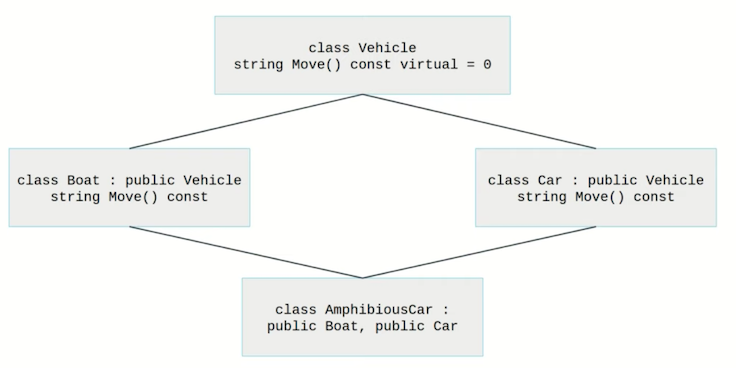

## Generic Programming
Generic programming is an example of polymorphism that generalizes the parameters of classes and functions. By using a C++ facility called a template, you can build classes and functions that work with many different types of data.

The vector class from the standard library is an example of generic programming. Next: Learn about templates and how to use them in generic programming to make your code more generalizable. That way you can reuse the code in many different situations. 

## Bjarne on Generic Programming
### Is there an alternative to inheritance?
That's where generic programming comes in. You have a bunch of classes, and you don't want to organize them in a hierarchy. 

What you want to say is e.g. "this algorithm works for anything that you can draw". You don't want to build a hierarchy so you can have in the interface a draw function. You just say that anything that you can draw you can use with this algorithm, and so you get parameterization. You have an algorithm that's parameterized with the element types, and it will work provided the element type has the required properties, like draw and rotate. So the hierarchy disappears, the inheritance disappears, but the ability to operate on anything that has the right interface stays. 

That's where the C++ language has moved to a more generic style of coding. 

## Templates
Templates are a tool for generic programming in C++. They allow us to specify a generic type, in this example we'll call that type T, and then use that generic type for the function signature and even within the function. 

In [2]:
#include <cassert>
#include <string>
#include <iostream>

template <typename T>
T Max(T a, T b) {
    return a > b ? a : b;
}

In [3]:
std::cout << Max<int>(2, 4) << std::endl;
std::cout << Max<double>(-1.0, -2.3) << std::endl;
std::cout << Max<char>('a', 'b') << std::endl;

4
-1
b


Templates enable generic programming by generalizing a function to apply to any class. Specifically, templates use _types_ as parameters so that the same implementation can operate on different data types.

For example, you might need a function to accept many different data types. The function acts on those arguments, perhaps dividing them or sorting them or something else. Rather than writing and maintaining the multiple function declarations, each accepting slightly different arguments, you can write one function and pass the argument types as parameters. At compile time, the compiler then expands the code using the types that are passed as parameters.

In [4]:
template <typename Type>
Type Sum(Type a, Type b) {
    return a + b; 
}

In [5]:
#include <iostream>

std::cout << Sum<double>(20.0, 13.4) << "\n"; 
std::cout << Sum<char>('Z', 'j') << "\n";

The keyword `template` is used to specify which function is generic. It is mandatory to put the `template<>` tag before the function signature, to specify and mark that the declaration is generic. 

Besides `template`, the keyword `typename` (or, alternatively, `class`) specifies the generic type in the function prototype. The parameters that follow `typename` (or `class`) represent generic types in the function declaration.

In order to instantiate a templatized class, use a templatized constructor, e.g. `Sum<double>(20.0, 13.7)`. 

## Bjarne on Templates
### What benefits do templates provide?
Templates in C++ is support for generic programming. A template is something you can parameterize with types or values. Classical example: Start with a vector of element types. These days we can have a vector and an allocator, which is an operation that parameterizes with this, so how it can get memory, and then once you have parameterized types, you need parameterized algorithms, because you want sort to work with various types of vectors, and the find function to work for both a vector of strings and a list of integers.

There's actually two parts of the support for generic programming in C++ now: 
* Templates
  * give us the ability to express just about anything and to manipulate things at compile-time and to do it really efficiently but it has had lousy interfaces: I could not actually say what are the requirements of the elements of a vector. It at least have to be copied - otherwise you can't do it in C++.
  * what is the requirement of something you can draw? That it has a draw operation. If you want to manipulate a shape, and it has a draw and rotate operation, we weren't able to express that. It's always been the idea that we'd like to be able to express it, but we haven't been able to until now. 
* C++20 will have something called concepts that allows you to precisely specify a template's requirements on its arguments. 

## Comparison Operation
```cpp
#include <assert.h>

template <typename T>
T Max(T a, T b) {
    return a > b ? a : b;
}

int main() { 
  assert(Max(10, 50) == 50);
  assert(Max(5.7, 1.436246) == 5.7);
}
```

## Deduction
Template deduction is when the compiler determines the type for a template automatically without us having to specify it. 


See the difference between total and partial [deduction](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#Rt-deduce). 

Deduction occurs when you instantiate an object without explicitly identifying the types. Instead, the compiler "deduces" the types. This can be helpful for writing code that is generic and can handle a variety of inputs. 

e.g. in the `Max` function as defined above, it is possible to explicitly state the type when calling it, or using type deduction by omitting the type:
```cpp
assert(Max<int>(2, 4) == 4);
assert(Max<double>(-1.0, -2.3) == -1.0);
assert(Max<char>('a', 'b') == 'b');

assert(Max(2, 4) == 4);
assert(Max(-1.0, -2.3) == -1.0);
assert(Max('a', 'b') == 'b');
```

When it comes to using vectors, C++17 can deduce the type used in vectors. Before that, the compiler would throw an error. So, this works in C++17:
```cpp
std::vector v{1, 2, 3};
assert(v.size() == 3);

// This is necessary in older C++ versions:
std::vector<int> v{1, 2, 3};
```

## Class Template
Classes are the building blocks of OOP in C++. Templates support the creation of generic classes!

Class templates can declare and implement generic attributes for use by generic methods. These templates can be very useful when building classes that will serve multiple purposes. 

In [6]:
#include <assert.h>
#include <string>
#include <sstream>
#include <iostream>

template <typename KeyType, typename ValueType>
class Mapping {
public:
  Mapping(KeyType key, ValueType value) : key(key), value(value) {}
  std::string Print() const {
    std::ostringstream stream;
    stream << key << ": " << value;
    return stream.str();
  }
  KeyType key;
  ValueType value;
};

In [7]:
// Test
Mapping<std::string, int> mapping("age", 20);
assert(mapping.Print() == "age: 20");
std::cout << mapping.Print() << std::endl;

## Summary
* Classes are how C++ groups information
* Members of those classes store data and provide functions
* Constructors instantiate objects of the class
* Classes encapsulate data and abstract how that data is used
* Users of the class only need to know about its interface, not about the details of how the data is stored or how the functions are implemented
* Inheritance hierarchies define how classes are related to each other and any members they might inherit
* Generic programming and polymorphism in particular, allow the same code to work with multiple different system-defined and user-defined types. This makes the code more reusable and saves repetition

## Bjarne on Best Practices with Classes
Map to the users concepts. Listen to them and have them explain their problems and solutions on a white board is an excellent way of learning that. 

Reading some sort of simplified book about a topic. If you're helping historians it would be a good idea to read a little bit of art history. If you're helping a biologist, you probably want to learn something about the kind of biology you're doing (e.g. genes, protein folding, cells, etc.). So you have to learn a bit so that you get the fundamental concepts. 

Now, once you've gotten that, start simple. A lot of people try to build the perfect model of the users/customers world. That never works. What you have to do is to build the simplest version of a few cases that you think you understand and then see if they work. They won't work. Not the first time. 

What you then do is you learn from this experience. You have the customers, users, whatever you call them, tell you what you got slightly wrong and then you extend them a little bit with the right facilities or fix them if they were wrong. 

This is basic engineering. You build something, you try it out, you rely on feedback, and then you evolve the system based on that. 